# Preprocessing

In [41]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
porter_stemmer  = PorterStemmer()
import re
import inflect
def Pre_Processing(file):
    token_files=[] 
    after_lower=[]
    after_lemmatizer=[]
    after_stemming=[]
    tokenizer = RegexpTokenizer(r'\w+')
    tokens=(tokenizer.tokenize(file))
    p = inflect.engine()
    token_files=[]
    for i in range(len(tokens)):
        if tokens[i].isnumeric() and len(tokens[i])<36:
            tem=p.number_to_words((tokens[i]))
            tokenizer = RegexpTokenizer(r'\w+')
            temp=(tokenizer.tokenize(tem))
            for x in temp:
                token_files.append(x)
        elif tokens[i].isnumeric() and len(tokens[i])>36:
            for j in range(len(tokens[i])):
                token_files.append(p.number_to_words((tokens[i][j])))
        else:
            token_files.append(tokens[i])
    for i in range(len(token_files)):
        after_lower.append(token_files[i].lower())
    for i in range(len(after_lower)):
        after_lemmatizer.append(wordnet_lemmatizer.lemmatize(after_lower[i]))
        #after_stemming.append(porter_stemmer.stem(after_lower[i]))
    return after_lemmatizer


# Train-Test Data Splitting

In [42]:
import os
import math
import codecs
TF_Dictionary={}
Docid=[]
Class_dict={}
parent="C:/Users/Devashi Jain/Desktop/IIIT-D/Information Retrieval/Assignment4/Classes"
for file_name in os.listdir(os.path.join(parent)): 
    for file in os.listdir(os.path.join(parent,file_name)):
        doc=file_name+'/'+file
        if file_name in Class_dict:
            Class_dict[file_name].append(doc)
        else:
            Class_dict[file_name]=[doc]
        Docid.append(doc)

In [43]:
train=[]
test=[]
for term in Class_dict:
    train.append(Class_dict[term][:int((len(Class_dict[term])+1)*.70)])
    test.append(Class_dict[term][int(len(Class_dict[term])*.70):])

In [44]:
train_data=[]
test_data=[]
for i in range(len(train)):
    for j in range(len(train[i])):
        train_data.append(train[i][j])
for i in range(len(test)):
    for j in range(len(test[i])):
        test_data.append(test[i][j])

In [45]:
c=0
for i in range(len(train_data)):
    for j in range(len(test_data)):
        if(train_data[i]==test_data[j]):
            c=c+1
print(c)


0


# Vocab Dictionary

In [46]:
import os
import math
import codecs
TF_Dictionary={}
Docid=[]
parent="C:/Users/Devashi Jain/Desktop/IIIT-D/Information Retrieval/Assignment4/Classes"
for file_name in os.listdir(os.path.join(parent)): 
    for file in os.listdir(os.path.join(parent,file_name)):
        doc=file_name+'/'+file
        preprossed_file=[]
        Normalized_TF={}
        if doc in train_data:
            fd=codecs.open(parent+'/'+file_name+'/'+file,'r',errors='ignore',encoding='utf-8')
            preprossed_file=Pre_Processing(fd.read())
            for i in range(len(preprossed_file)):

                if preprossed_file[i] in Normalized_TF:
                    Normalized_TF[preprossed_file[i]]+=1
                else:
                    Normalized_TF[preprossed_file[i]]=1


            for i in range(len(preprossed_file)):
                if preprossed_file[i] in TF_Dictionary:
                    TF_Dictionary[preprossed_file[i]][doc]=Normalized_TF[preprossed_file[i]]
                else:
                    TF_Dictionary[preprossed_file[i]] = {doc:Normalized_TF[preprossed_file[i]]}

       

In [47]:
import math
for term in TF_Dictionary:
    IDF=1+math.log(3500/len(TF_Dictionary[term]))
    for file in TF_Dictionary[term]:
        TF_Dictionary[term][file]*=IDF

In [48]:
TF_IDF_Dictionary={}
for term in TF_Dictionary:
    t=0
    for doc in TF_Dictionary[term]:
        t=t+TF_Dictionary[term][doc]
    TF_IDF_Dictionary[term]=t

In [49]:
Top_Features={}
n=int(len(TF_IDF_Dictionary)*0.6)
t = sorted(TF_IDF_Dictionary.items(), key=lambda x:-x[1])[:n]
for i in range(len(t)):
    Top_Features[t[i][0]]=t[i][1]

# Document Dictionary

In [50]:
import os
import math
import codecs

Doc_Vec={}
for doc1 in train_data:
    c=0
    for term in Top_Features.keys():
        if doc1 not in Doc_Vec:
            Doc_Vec.setdefault(doc1,{})
            Doc_Vec[doc1]={term:0}
            c=c+1
        else:
            Doc_Vec[doc1][term]=0
            c=c+1

In [51]:
import math
parent="C:/Users/Devashi Jain/Desktop/IIIT-D/Information Retrieval/Assignment4/Classes"
for file_name in os.listdir(os.path.join(parent)): 
    for file in os.listdir(os.path.join(parent,file_name)):
        doc=file_name+'/'+file
        preprossed_file=[]
        Normalized_TF={}
        if doc in train_data:
            fd=codecs.open(parent+'/'+file_name+'/'+file,'r',errors='ignore',encoding='utf-8')
            preprossed_file=Pre_Processing(fd.read())
            for i in range(len(preprossed_file)):

                if preprossed_file[i] in Normalized_TF:
                    Normalized_TF[preprossed_file[i]]+=1
                else:
                    Normalized_TF[preprossed_file[i]]=1

            for term in Doc_Vec[doc]:
                if term in Normalized_TF:
                    Doc_Vec[doc][term]=Normalized_TF[term]
                
    

# Class Dictionary

In [52]:
Class_Vector={}
for docid in Doc_Vec.keys():
    for term in Top_Features.keys():
        label=docid.split('/')
        if label[0] in Class_Vector:
            if term in Class_Vector[label[0]]:
                Class_Vector[label[0]][term]+=Doc_Vec[docid][term]
            else:
                Class_Vector[label[0]].update({term : Doc_Vec[docid][term]})
        else :
            Class_Vector[label[0]]={term:Doc_Vec[docid][term]}
                    
        

        
    

In [53]:
for term in Class_Vector:
    print(term)

comp.graphics
rec.sport.hockey
sci.med
sci.space
talk.politics.misc


In [54]:
count={}
for classes in Class_Vector:
    print(classes)
    s=0
    for word in Class_Vector[classes]:
            s+=Class_Vector[classes][word]
    count[classes]=s

comp.graphics
rec.sport.hockey
sci.med
sci.space
talk.politics.misc


In [55]:
print(count)

{'comp.graphics': 279774, 'rec.sport.hockey': 305145, 'sci.med': 319363, 'sci.space': 309015, 'talk.politics.misc': 407333}


In [62]:
import os
import math
import codecs
Predicted=[]
Actual=[]
import operator
parent="C:/Users/Devashi Jain/Desktop/IIIT-D/Information Retrieval/Assignment4/Classes"
for file_name in os.listdir(os.path.join(parent)): 
    for file in os.listdir(os.path.join(parent,file_name)):
        doc=file_name+'/'+file
        
        if doc in test_data:
            label=doc.split('/')
            Actual.append(label[0])
            fd=codecs.open(parent+'/'+file_name+'/'+file,'r',errors='ignore',encoding='utf-8')
            preprossed_file=Pre_Processing(fd.read())
            Naive_Bayes={}
            for classes in Class_Vector:
                x=0
                for word in preprossed_file:
                    if word in Class_Vector[classes]:
                        y=math.log(((Class_Vector[classes][word])+1)/(count[classes]+len(TF_Dictionary)))
                        x=x+y
                Naive_Bayes[classes]=(x*(1/700))
            Predicted.append(max(Naive_Bayes.items(), key=operator.itemgetter(1))[0])
                       

In [66]:
def Accuracy(Predicted,Actual):
    c=0
    for i in range(len(Actual)):
        if Predicted[i]==Actual[i]:
            c=c+1
    return (c)/len(Actual)

In [67]:
list1=['comp.graphics',
'rec.sport.hockey',
'sci.med',
'sci.space',
'talk.politics.misc']
Predicted_label=[]
for i in range(len(Predicted)):
    if Predicted[i]==list1[0]:
        Predicted_label.append((Predicted[i],0))
    elif Predicted[i]==list1[1]:
        Predicted_label.append((Predicted[i],1))
    elif Predicted[i]==list1[2]:
        Predicted_label.append((Predicted[i],2))
    elif Predicted[i]==list1[3]:
        Predicted_label.append((Predicted[i],3))
    elif Predicted[i]==list1[4]:
        Predicted_label.append((Predicted[i],4))
Actual_label=[]
for i in range(len(Actual)):
    if Actual[i]==list1[0]:
        Actual_label.append((Actual[i],0))
    if Actual[i]==list1[1]:
        Actual_label.append((Actual[i],1))
    if Actual[i]==list1[2]:
        Actual_label.append((Actual[i],2))
    if Actual[i]==list1[3]:
        Actual_label.append((Actual[i],3))
    if Actual[i]==list1[4]:
        Actual_label.append((Actual[i],4))

Accuracy is : 0.956
[287.   2.   1.   7.   3.]
[  0. 296.   1.   0.   3.]
[ 19.   3. 274.   1.   3.]
[  8.   0.   2. 280.  10.]
[  2.   0.   1.   0. 297.]


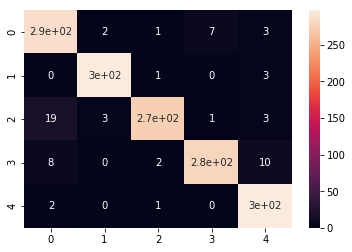

In [69]:
import seaborn as sns
import numpy as np
def ConfusionMatrix(Actual,Predicted):
    confusion_matrix=np.zeros((5,5))
    for i in range(len(Actual)):
        confusion_matrix[int(Actual[i][1])][int(Predicted[i][1])]=(confusion_matrix[int(Actual[i][1])][int(Predicted[i][1])])+1
    return confusion_matrix
accuracy=Accuracy(Predicted,Actual)
print("Accuracy is :",accuracy)
confusion_matrix=ConfusionMatrix(Actual_label,Predicted_label)
for i in range(len(confusion_matrix)):
    print(confusion_matrix[i])
sns.heatmap(confusion_matrix,annot=True)